## Importações

Nessa primeira sessão importarei de antemão todas as bibliotecas de python necessário para a execução dos códigos abaixo, evitando importações separadas em células, exceto quando parecer por bem deixar claro qual biblioteca esta sendo utilizada 

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
from binance.client import Client
import seaborn as sns
import numpy as np

# Criando a primeira chamana na API da binance

In [4]:
#Realizando o primeiro teste, preço do BTC


# Sem autenticação (somente leitura pública)
client = Client()

# Preço atual do BTC em USDT
ticker = client.get_symbol_ticker(symbol="BTCUSDT")
print(f"Preço do BTC/USDT: {ticker['price']}")

Preço do BTC/USDT: 109643.56000000


In [5]:
#Verificnado todos os tickers/symbls disponivei
import pandas as pd

client = Client()

# Pega todas as informações da exchange
exchange_info = client.get_exchange_info()

# Extrai os símbolos
symbols = [s['symbol'] for s in exchange_info['symbols']]

In [6]:
#quantidade de symbols (pares de trading)
len(symbols)

3111

In [7]:
# Exibindo todos os simbolos (par de trading) disponíveis
df_symbols = pd.DataFrame({
        'Symbol':symbols,
    }).sort_values(by='Symbol')

df_symbols.head(30)

,Symbol
2857,1000CATBNB
2858,1000CATFDUSD
2859,1000CATTRY
2867,1000CATUSDC
2856,1000CATUSDT
2924,1000CHEEMSUSDC
2923,1000CHEEMSUSDT
2385,1000SATSFDUSD
2386,1000SATSTRY
2679,1000SATSUSDC


In [8]:
#Pares de BTC
#Aqui eu filtro apenas para os parece de bitcon

df_symbols[
    df_symbols['Symbol'].str.contains('BTC')
]

,Symbol
1221,1INCHBTC
1089,AAVEBTC
1910,ACABTC
2399,ACEBTC
1872,ACHBTC
...,...
317,ZENBTC
269,ZILBTC
2661,ZKBTC
2669,ZROBTC


# Historico de Preço

Aqui estarei realizando a primeira consulta na base de dados da binance, observando como os dados são puxados de forma crua, sem formatação

In [10]:
klines = client.get_historical_klines("BTCBRL", '1d', "1 May, 2024")
klines[0:20]

[[1714521600000,
  '317807.00000000',
  '318588.00000000',
  '296109.00000000',
  '304714.00000000',
  '342.57879000',
  1714607999999,
  '103659824.50895000',
  54261,
  '163.69585000',
  '49547822.87591000',
  '0'],
 [1714608000000,
  '304706.00000000',
  '307000.00000000',
  '297392.00000000',
  '304418.00000000',
  '255.28507000',
  1714694399999,
  '77440669.22404000',
  29023,
  '129.32894000',
  '39241599.27295000',
  '0'],
 [1714694400000,
  '304378.00000000',
  '323428.00000000',
  '303025.00000000',
  '321196.00000000',
  '239.96462000',
  1714780799999,
  '74786807.61199000',
  30619,
  '122.79795000',
  '38265335.27184000',
  '0'],
 [1714780800000,
  '321196.00000000',
  '329999.00000000',
  '319724.00000000',
  '326819.00000000',
  '95.77485000',
  1714867199999,
  '31124021.08664000',
  18153,
  '48.81042000',
  '15859295.37828000',
  '0'],
 [1714867200000,
  '326866.00000000',
  '330204.00000000',
  '321340.00000000',
  '327115.00000000',
  '94.82260000',
  1714953599999

Como se pode observer, os dados é uma lista de lista, sem nome de colunas, por isso se faz necessário uma formatação

In [282]:
#Criando o nome das colunas
df = pd.DataFrame(klines, columns=[
    "timestamp", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])

# Converter timestamp para datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")


cols = ["open", "high", "low", "close", "volume"]

#Aplicando o cifrão para melhor visualização
df[cols] = df[cols].apply(lambda col: col.str.slice(0, 10)) + "R$" 



#Visulizando o DataFrame
df

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2025-01-01,93576.0000R$,95151.1500R$,92888.0000R$,94591.7900R$,10373.3261R$,1735775999999,975444194.13799830,1516556,5347.73648000,502914035.64059070,0
1,2025-01-02,94591.7800R$,97839.5000R$,94392.0000R$,96984.7900R$,21970.4894R$,1735862399999,2118411852.68127950,3569079,10915.96986000,1052226710.33367170,0
2,2025-01-03,96984.7900R$,98976.9100R$,96100.0100R$,98174.1800R$,15253.8293R$,1735948799999,1486610768.59079170,2851164,7468.60797000,727787246.89655880,0
3,2025-01-04,98174.1700R$,98778.4300R$,97514.7900R$,98220.5000R$,8990.05651R$,1736035199999,881223751.63536030,1559982,4350.80221000,426524714.13055390,0
4,2025-01-05,98220.5100R$,98836.8500R$,97276.7900R$,98363.6100R$,8095.63723R$,1736121599999,793931715.95463240,1685799,3877.90985000,380355340.46860360,0
...,...,...,...,...,...,...,...,...,...,...,...,...
141,2025-05-22,109643.990R$,111980.000R$,109177.370R$,111696.210R$,31630.7731R$,1747958399999,3509432834.57341730,5794216,16584.56293000,1840083098.58278590,0
142,2025-05-23,111696.220R$,111800.000R$,106800.000R$,107318.300R$,31737.7230R$,1748044799999,3469704446.39040470,5251192,14309.31652000,1565622441.18751700,0
143,2025-05-24,107318.300R$,109506.030R$,106875.410R$,107761.910R$,16782.5312R$,1748131199999,1819958819.77485860,2805418,8786.90747000,953683093.32165700,0
144,2025-05-25,107761.900R$,109299.990R$,106600.640R$,109004.190R$,17710.0469R$,1748217599999,1904366455.42585800,3151168,7867.16712000,846688135.00971360,0


# Convertendo a coluna para float

###  O que é um dado do tipo float?

Quando programamos, o computador precisa saber que tipo de informação estamos usando. Um desses tipos é o float.

📌 Explicando de forma simples:
Imagine que você está anotando preços de Bitcoin. Alguns valores são assim:

45000

46782.55

43870.90

Esses números têm casas decimais, ou seja, não são inteiros. Eles representam valores com vírgula, como fazemos no dia a dia com dinheiro, peso ou temperatura.

No Python (e em muitas linguagens de programação), esses números com vírgula são chamados de float — que vem de “floating point number” (número de ponto flutuante).

In [284]:
#Primeiro eu devo remover o cifrão, afinal, para converter os dados para o flot, eu preciso remover os cracteres de texto
df[cols] = df[cols].apply(lambda col: col.str.replace("R$", ''))

#Agora sim realizo a conversõ
df[cols] = df[cols].astype(float)
df.head(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2025-01-01,93576.00,95151.15,92888.00,94591.79,10373.32610,1735775999999,975444194.13799830,1516556,5347.73648000,502914035.64059070,0
1,2025-01-02,94591.78,97839.50,94392.00,96984.79,21970.48940,1735862399999,2118411852.68127950,3569079,10915.96986000,1052226710.33367170,0
2,2025-01-03,96984.79,98976.91,96100.01,98174.18,15253.82930,1735948799999,1486610768.59079170,2851164,7468.60797000,727787246.89655880,0
3,2025-01-04,98174.17,98778.43,97514.79,98220.50,8990.05651,1736035199999,881223751.63536030,1559982,4350.80221000,426524714.13055390,0
4,2025-01-05,98220.51,98836.85,97276.79,98363.61,8095.63723,1736121599999,793931715.95463240,1685799,3877.90985000,380355340.46860360,0


### Verificando os tipos de dados

Aqui irei usar um comando intrinsico da biblioteca pandas para verificar se de fato o tipo de dado foi alterado

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     146 non-null    datetime64[ns]
 1   open                          146 non-null    float64       
 2   high                          146 non-null    float64       
 3   low                           146 non-null    float64       
 4   close                         146 non-null    float64       
 5   volume                        146 non-null    float64       
 6   close_time                    146 non-null    int64         
 7   quote_asset_volume            146 non-null    object        
 8   number_of_trades              146 non-null    int64         
 9   taker_buy_base_asset_volume   146 non-null    object        
 10  taker_buy_quote_asset_volume  146 non-null    object        
 11  ignore                        14

### Ordenando

Pode-se utilizar uma outra propriedade do pandas para ordenar o DataFrame com base em um coluna, no exemplo abaixo, estou ordenndo pela data, que é o que faz mais sentido a princípio

In [321]:
df = df.sort_values(
    by = 'timestamp', #Aqui defino o nome da coluna pela qual quero ordenar
    ascending = False
)

df

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
145,2025-05-26,109004.20,110228.11,108670.58,109620.93,7098.59196,1748303999999,778032538.80484750,1252522,3493.67355000,382942965.52082440,0
144,2025-05-25,107761.90,109299.99,106600.64,109004.19,17710.04690,1748217599999,1904366455.42585800,3151168,7867.16712000,846688135.00971360,0
143,2025-05-24,107318.30,109506.03,106875.41,107761.91,16782.53120,1748131199999,1819958819.77485860,2805418,8786.90747000,953683093.32165700,0
142,2025-05-23,111696.22,111800.00,106800.00,107318.30,31737.72300,1748044799999,3469704446.39040470,5251192,14309.31652000,1565622441.18751700,0
141,2025-05-22,109643.99,111980.00,109177.37,111696.21,31630.77310,1747958399999,3509432834.57341730,5794216,16584.56293000,1840083098.58278590,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-01-05,98220.51,98836.85,97276.79,98363.61,8095.63723,1736121599999,793931715.95463240,1685799,3877.90985000,380355340.46860360,0
3,2025-01-04,98174.17,98778.43,97514.79,98220.50,8990.05651,1736035199999,881223751.63536030,1559982,4350.80221000,426524714.13055390,0
2,2025-01-03,96984.79,98976.91,96100.01,98174.18,15253.82930,1735948799999,1486610768.59079170,2851164,7468.60797000,727787246.89655880,0
1,2025-01-02,94591.78,97839.50,94392.00,96984.79,21970.48940,1735862399999,2118411852.68127950,3569079,10915.96986000,1052226710.33367170,0


No entando eu posso ordenar por qualquer coluna que eu queira, a exemplo abaixo, irei ordenar pelo valor de fechamento (close) do bitcoin

In [326]:
df.sort_values(
    by = 'close', #Aqui defino o nome da coluna pela qual quero ordenar
    ascending = False
)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
141,2025-05-22,109643.99,111980.00,109177.37,111696.21,31630.77310,1747958399999,3509432834.57341730,5794216,16584.56293000,1840083098.58278590,0
140,2025-05-21,106850.00,110797.38,106100.01,109643.99,45531.04030,1747871999999,4914709514.32002680,6835279,23661.64939500,2555528481.09872580,0
145,2025-05-26,109004.20,110228.11,108670.58,109620.93,7098.59196,1748303999999,778032538.80484750,1252522,3493.67355000,382942965.52082440,0
144,2025-05-25,107761.90,109299.99,106600.64,109004.19,17710.04690,1748217599999,1904366455.42585800,3151168,7867.16712000,846688135.00971360,0
143,2025-05-24,107318.30,109506.03,106875.41,107761.91,16782.53120,1748131199999,1819958819.77485860,2805418,8786.90747000,953683093.32165700,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,2025-04-10,82615.22,82753.21,78464.36,79607.30,33284.80710,1744329599999,2690294353.84784260,4529545,16339.91910000,1321475356.02008490,0
96,2025-04-07,78430.00,81243.58,74508.00,79163.24,78387.53080,1744070399999,6084614024.15064720,9736596,39075.84274000,3034375055.68439650,0
68,2025-03-10,80734.48,84123.46,77459.91,78595.86,47633.38400,1741651199999,3834924947.75818610,8701538,22898.57072000,1846606255.35214860,0
95,2025-04-06,83537.99,83817.63,77153.83,78430.00,27942.71430,1743983999999,2239085051.15296450,3948493,12493.84490000,1001459573.49446610,0


# Criando uma função 

Como visto anteriormente, formar o dataframe da um certo trabalho, então mas facil é criar uma função que facilite essa tarefa, onde eu apenas tenha que passar o Par de trading, intervalo e data para puxar os dados da biblioteca da binance

In [330]:
def pegar_historico(par, intervalo, data_inicio):
    
    klines = client.get_historical_klines(par, intervalo, data_inicio)
    
    df = pd.DataFrame(klines, columns=[
    "timestamp", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
    ])

    # Converter timestamp para datetime
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

    cols = ["open", "high", "low", "close", "volume"]
    df[cols] = df[cols].astype(float)
    return df

In [334]:
#Testando a função para o par de trding BTCBRL
par = "BTCBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_btcbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

df_btcbrl.head(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,1735775999999,42310167.57540000,21358,41.00811000,24046544.55393000,0
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1735862399999,99793602.55375000,47531,78.05491000,46770433.42530000,0
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,1735948799999,77592339.31612000,39792,61.49631000,37100120.06508000,0
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,1736035199999,39296764.14958000,27377,31.38893000,19078907.64598000,0
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,1736121599999,35453798.90673000,22973,27.81086000,16944045.55734000,0


In [336]:
#Criando Par de ETHBRL
# Utilizando ethereum como exeplo para se certificar que a função consegue puxar valores de par de trading diferentes de bitcoin
par = "ETHBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_ethbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

df_ethbrl.head(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2025-01-01,20803.00,21009.86,20654.09,20911.17,585.7911,1735775999999,12215739.72054000,6336,405.06440000,8449878.43802700,0
1,2025-01-02,20914.39,21886.69,20871.46,21356.75,973.6267,1735862399999,20871615.22898300,13247,504.75730000,10818566.95203500,0
2,2025-01-03,21357.14,22512.12,21170.34,22332.58,1234.5078,1735948799999,27109384.99640100,13595,606.88440000,13331542.71594100,0
3,2025-01-04,22336.05,22773.18,22148.35,22687.00,592.4939,1736035199999,13314175.66013600,8765,320.90460000,7212519.16903200,0
4,2025-01-05,22686.33,22793.78,22307.44,22593.04,459.6876,1736121599999,10365797.12512300,6601,241.72320000,5450638.75970500,0


A função criada nessa introdução irá auxilar no estudos dos demais estudos, sendo exportado para um arquivo diferente

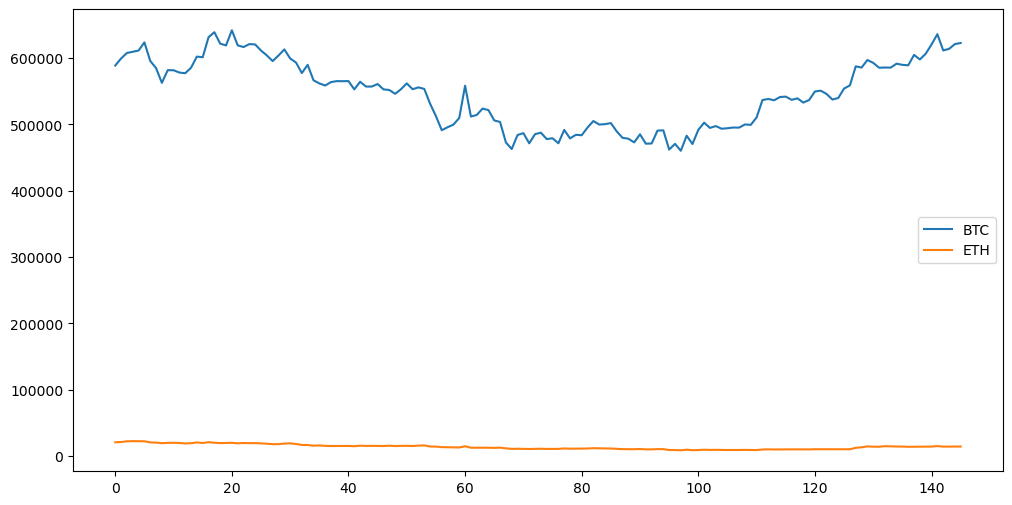

In [24]:
plt.figure(figsize=(12,6))

plt.plot(df_btceth_close['BTC_close'], label="BTC")
plt.plot(df_btceth_close['ETH_close'], label="ETH")
plt.legend()

In [25]:
df_btceth_close['BTC_close'] / df_btceth_close['BTC_close'].iloc[0] * 100

0      100.000000
1      101.802807
2      103.208633
3      103.519661
4      103.835616
          ...    
141    108.017082
142    103.865682
143    104.254510
144    105.487240
145    105.773977
Name: BTC_close, Length: 146, dtype: float64

## Meme Coins / Alt Coins

In [28]:
#Criando uma lista com o par de trading para cada alt coin desejada
pares = ["SOLBRL", "SHIBBRL","POLBRL","XRPBRL","BNBBRL"]

#O resto segue o mesmo
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_memecoins = pd.DataFrame()

for token in pares:
    df_memecoins[token] = pegar_historico(token, intervalo, data_inicio)['close']

In [29]:
memecoins_describe = df_memecoins.describe()
memecoins_describe.index=['Quantidade', 'Média', 'Desvio Padrao', 'Minimo', '25%', '50%', '75%', 'Maximo']

np.round(memecoins_describe, 3)

,SOLBRL,SHIBBRL,POLBRL,XRPBRL,BNBBRL
Quantidade,146.000,146.0,146.000,146.000,146.000
Média,976.514,0.0,1.690,14.146,3692.260
Desvio Padrao,239.429,0.0,0.620,2.017,314.147
Minimo,624.200,0.0,1.006,10.830,3128.000
25%,786.900,0.0,1.248,12.659,3456.250
50%,940.050,0.0,1.426,13.646,3601.500
75%,1140.000,0.0,1.845,14.819,3843.750
Maximo,1600.600,0.0,3.252,19.988,4448.000


In [30]:
df_memecoins.head(30)

,SOLBRL,SHIBBRL,POLBRL,XRPBRL,BNBBRL
0,1209.1,0.000135,2.945,14.514,4408.0
1,1286.9,0.000142,2.996,14.848,4366.0
2,1349.1,0.000151,3.211,15.186,4423.0
3,1344.0,0.000151,3.252,15.011,4427.0
4,1325.8,0.000149,3.209,14.911,4408.0
5,1331.3,0.000147,3.199,14.761,4448.0
6,1242.0,0.000134,2.884,13.950,4289.0
7,1215.0,0.000131,2.863,14.594,4280.0
8,1124.3,0.000128,2.723,13.819,4167.0
9,1152.1,0.000132,2.812,14.379,4257.0


In [31]:
df_memecoins.columns

Index(['SOLBRL', 'SHIBBRL', 'POLBRL', 'XRPBRL', 'BNBBRL'], dtype='object')

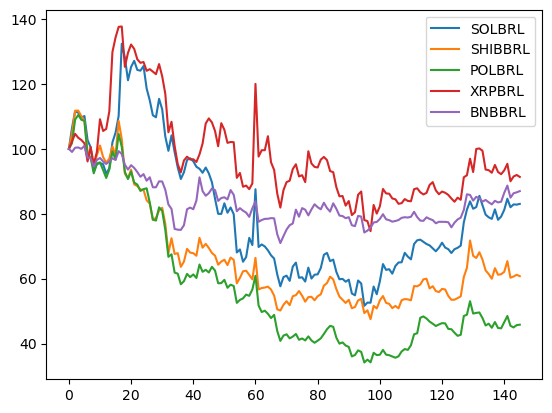

In [32]:
for i in df_memecoins.columns:
    plt.plot(df_memecoins[i] / df_memecoins[i].iloc[0] * 100, label=i)

plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_5608\2784098329.py:4: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('C:\Personal\python_bitcoin\post6.png')


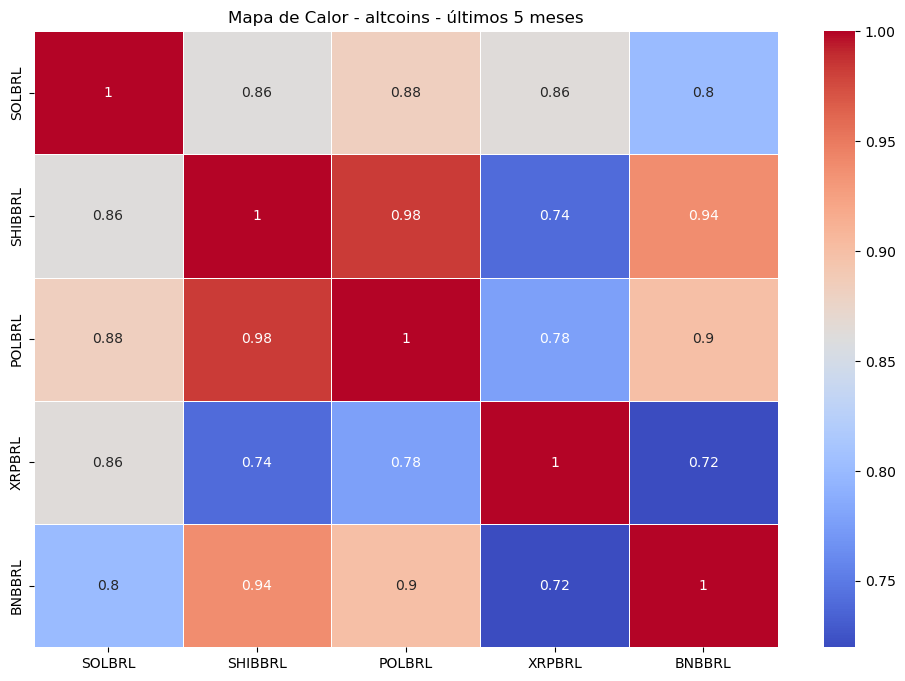

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_memecoins.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - altcoins - últimos 5 meses')
plt.savefig('C:\Personal\python_bitcoin\post6.png')

In [34]:
describe = pd.DataFrame(
    df_btceth_close.describe(),
)

describe.index = index=['Quantidade', 'Média', 'Desvio Padrao', 'Minimo', '25%', '50%', '75%', 'Maximo']

np.round(
    describe
)


,BTC_close,ETH_close
Quantidade,146.0,146.0
Média,546720.0,14105.0
Desvio Padrao,50767.0,3836.0
Minimo,460241.0,8888.0
25%,496143.0,10616.0
50%,552778.0,14160.0
75%,589721.0,15885.0
Maximo,641806.0,22687.0


In [35]:
df_btceth_close

,BTC_close,ETH_close
0,588693.0,20911.17
1,599306.0,21356.75
2,607582.0,22332.58
3,609413.0,22687.00
4,611273.0,22593.04
...,...,...
141,635889.0,15165.55
142,611450.0,14398.50
143,613739.0,14408.60
144,620996.0,14537.04


In [36]:
ha = df_btceth_close['BTC_close'].rolling(window=20).mean()

print(
    len(ha),'\n',
    len(df_btceth_close)
)

146 
 146


<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_5608\284643300.py:12: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('C:\Personal\python_bitcoin\post7.png')


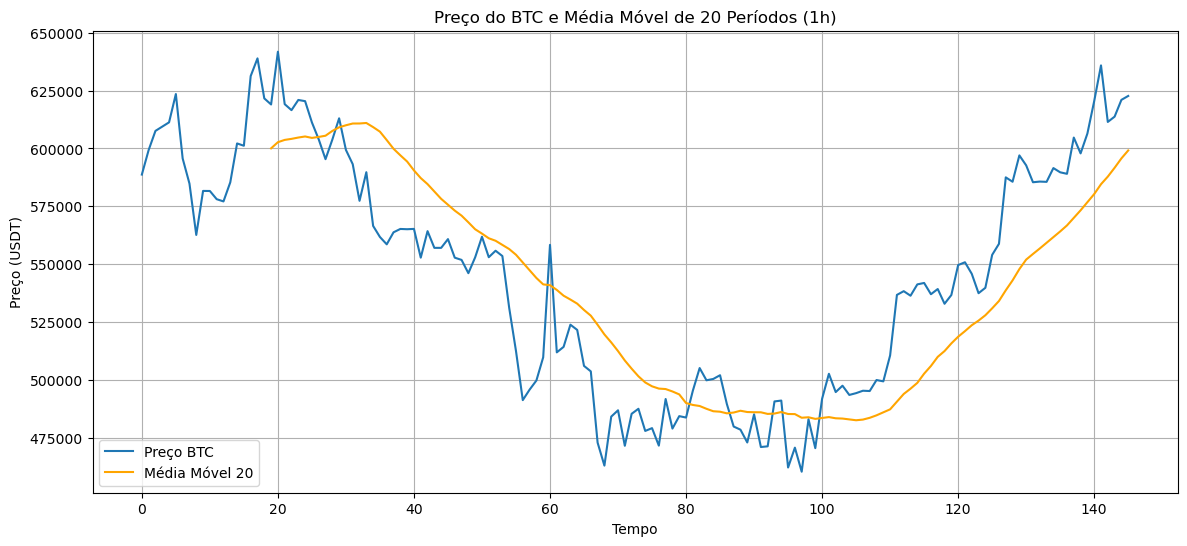

In [37]:

df_btceth_close['BTC_SMA20'] = df_btceth_close['BTC_close'].rolling(window=20).mean()

plt.figure(figsize=(14,6))
plt.plot(df_btceth_close['BTC_close'], label='Preço BTC')
plt.plot(df_btceth_close['BTC_SMA20'], label='Média Móvel 20', color='orange')
plt.title('Preço do BTC e Média Móvel de 20 Períodos (1h)')
plt.xlabel('Tempo')
plt.ylabel('Preço (USDT)')
plt.legend()
plt.grid(True)

plt.savefig('C:\Personal\python_bitcoin\post7.png')
plt.show()

In [38]:
df_btceth_close['retorno_btc'] = df_btceth_close['BTC_close'].pct_change()
df_btceth_close

,BTC_close,ETH_close,BTC_SMA20,retorno_btc
0,588693.0,20911.17,NaN,NaN
1,599306.0,21356.75,NaN,0.018028
2,607582.0,22332.58,NaN,0.013809
3,609413.0,22687.00,NaN,0.003014
4,611273.0,22593.04,NaN,0.003052
...,...,...,...,...
141,635889.0,15165.55,584531.00,0.024872
142,611450.0,14398.50,587813.35,-0.038433
143,613739.0,14408.60,591629.50,0.003744
144,620996.0,14537.04,595691.95,0.011824


In [39]:
vol_daily = df_btceth_close['retorno_btc'].std()
vol_annual = vol_daily * (252 ** 0.5)

vol_annual

0.37831258126635336

In [40]:
df_btceth_close['Cumulative'] = (1 + df_btceth_close['retorno_btc']).cumprod()
df_btceth_close['Peak'] = df_btceth_close['Cumulative'].cummax()
df_btceth_close['Drawdown'] = (df_btceth_close['Cumulative'] - df_btceth_close['Peak']) / df_btceth_close['Peak']
max_dd = df_btceth_close['Drawdown'].min()

In [41]:
df_btceth_close.drop('ETH_close', axis=1, inplace=True)

In [42]:
df_btceth_close

,BTC_close,BTC_SMA20,retorno_btc,Cumulative,Peak,Drawdown
0,588693.0,NaN,NaN,NaN,NaN,NaN
1,599306.0,NaN,0.018028,1.018028,1.018028,0.000000
2,607582.0,NaN,0.013809,1.032086,1.032086,0.000000
3,609413.0,NaN,0.003014,1.035197,1.035197,0.000000
4,611273.0,NaN,0.003052,1.038356,1.038356,0.000000
...,...,...,...,...,...,...
141,635889.0,584531.00,0.024872,1.080171,1.090222,-0.009219
142,611450.0,587813.35,-0.038433,1.038657,1.090222,-0.047298
143,613739.0,591629.50,0.003744,1.042545,1.090222,-0.043731
144,620996.0,595691.95,0.011824,1.054872,1.090222,-0.032424


In [43]:
df_btceth_close.columns

Index(['BTC_close', 'BTC_SMA20', 'retorno_btc', 'Cumulative', 'Peak',
       'Drawdown'],
      dtype='object')

In [45]:
!pip install -U kaleido

In [48]:
import plotly.express as px
plt.figure(
    figsize=(12,8)
)

px.line(
    df_btceth_close['Drawdown'],
    width=1200,    # largura em pixels
    height=600     # altura em pixels
)


<Figure size 1200x800 with 0 Axes>